# Analyzing Students Mental Health using SQL

![Mental Health](https://cdn.pixabay.com/photo/2022/10/18/11/02/mood-7529903_640.png)

## Step 1: Import Packages 📦
To query the data using SQL, I will require the following packages to help me!

In [4]:
import pandas as pd
import sqlite3
import plotly.express as px

## Step 2: Import the Data ⬇️

This data was taken from a survey that was conducted in 2018 at an international Japanese university and the associated study was published in 2019. It was approved by several ethical and regulatory boards. (https://www.mdpi.com/2306-5729/4/3/124)

The study found that international students have a higher risk of mental health difficulties compared to the general population, and that social connectedness and acculturative stress are predictive of depression.

- Social connectedness: measure of belonging to a social group or network.

- Acculturative stress: stress associated with learning about and intergrating into a new culture.

In [5]:
# Importing the CSV File
df = pd.read_csv("mental_health.csv")

df.head()

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No


## Step 3: Creating Connection Between Database and Dataset 🔗

In [6]:
conn = sqlite3.connect("mental_heath.db")

df.to_sql("mental_health", conn)

286

#### The `%load_ext sql` command is used to load SQL magic commands in Jupyter Notebook/IPython, allowing us to execute SQL queries directly within the notebook.

In [7]:
# Load the sql modules to iPython
%load_ext sql

# We are now trying to connect to an SQLite database named ramen.db using SQL magic commands in an IPython environment. 
# This command will establish a connection to the SQLite database, allowing you to execute SQL queries directly within your IPython environment.
%sql sqlite:///mental_heath.db

## Step 4: Exploring the Mental Health Dataset 🔍

#### Querying the data using SQL

In [8]:
%%sql

SELECT *
FROM mental_health
LIMIT 10;

 * sqlite:///mental_heath.db
Done.


index,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,English,English_cate,Intimate,Religion,Suicide,Dep,DepType,ToDep,DepSev,ToSC,APD,AHome,APH,Afear,ACS,AGuilt,AMiscell,ToAS,Partner,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Internet,Partner_bi,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,5.0,High,None,Yes,No,No,No,0.0,Min,34.0,23.0,9.0,11.0,8.0,11.0,2.0,27.0,91.0,5.0,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,None,Yes,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,4.0,High,None,No,No,No,No,2.0,Min,48.0,8.0,7.0,5.0,4.0,3.0,2.0,10.0,39.0,7.0,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,None,Yes,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,4.0,High,Yes,Yes,No,No,No,2.0,Min,41.0,13.0,4.0,7.0,6.0,4.0,3.0,14.0,51.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,None,No,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,3.0,Average,No,No,No,No,No,3.0,Min,37.0,16.0,10.0,10.0,8.0,6.0,4.0,21.0,75.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,None,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,3.0,Average,Yes,No,No,No,No,3.0,Min,37.0,15.0,12.0,5.0,8.0,7.0,4.0,31.0,82.0,5.0,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,None,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
5,Inter,SEA,Male,Grad,24.0,4.0,6.0,Long,3.0,Average,4.0,High,Yes,No,No,No,No,6.0,Mild,38.0,18.0,8.0,10.0,8.0,7.0,3.0,29.0,83.0,6.0,5.0,4.0,2.0,1.0,1.0,2.0,1.0,5.0,1.0,None,Yes,Yes,No,No,No,No,No,No,Yes,No,No
6,Inter,SA,Male,Grad,23.0,4.0,1.0,Short,3.0,Average,5.0,High,Yes,No,No,No,No,3.0,Min,46.0,17.0,6.0,10.0,5.0,3.0,2.0,15.0,58.0,7.0,5.0,7.0,2.0,2.0,1.0,5.0,1.0,1.0,1.0,None,Yes,Yes,Yes,No,No,No,Yes,No,No,No,No
7,Inter,SEA,Female,Grad,30.0,5.0,2.0,Medium,1.0,Low,1.0,Low,Yes,Yes,Yes,No,No,9.0,Mild,41.0,16.0,20.0,19.0,15.0,11.0,6.0,40.0,127.0,7.0,2.0,2.0,2.0,6.0,2.0,1.0,1.0,3.0,1.0,None,Yes,No,No,No,Yes,No,No,No,No,No,No
8,Inter,SEA,Female,Grad,25.0,4.0,4.0,Long,4.0,High,4.0,High,No,No,No,Yes,Other,7.0,Mild,36.0,22.0,12.0,13.0,13.0,10.0,6.0,33.0,109.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,None,No,No,No,No,No,No,No,No,No,No,No
9,Inter,Others,Male,Grad,31.0,5.0,2.0,Medium,1.0,Low,4.0,High,Yes,Yes,No,No,No,3.0,Min,48.0,8.0,4.0,5.0,12.0,3.0,2.0,17.0,51.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,None,No,No,No,No,No,No,No,No,No,No,No


Awesome, the query ran successfully! Time to delve deeper into this dataset and explore.

### Additional: Writing a Python Function for Data Visualization

In [9]:
# Writing a Python Code for Data Vlsualization Purposes
def data_viz(df, column_name, chart_type = "bar"):
    sessions_per_group = df.groupby(column_name).size().reset_index(name = "sessions").sort_values(by = "sessions")
    if chart_type == "bar":
        fig = px.bar(
            sessions_per_group,
            x = column_name,
            y = "sessions",
            title = f'{column_name.capitalize()} Distribution', #.capitalize() is used to cap the first letter of the word
            text = "sessions"
        )

        fig.update_yaxes(title_text = f"{column_name} Count") # Generate y-axis in plotly (follow the exact syntax)
        fig.update_xaxes(title_text = "") # Generate x-axis in plotly (follow the exact syntax)
        fig.show("png")

    elif chart_type == "line":
        fig = px.line(
            sessions_per_group,
            x = column_name,
            y = "sessions",
            title = f'{column_name.capitalize()} Distribution', #.capitalize() is used to cap the first letter of the word
            text = "sessions"
        )

        fig.update_yaxes(title_text = f"{column_name} Count") # Generate y-axis in plotly (follow the exact syntax)
        fig.update_xaxes(title_text = "") # Generate x-axis in plotly (follow the exact syntax)
        fig.show("png")
    
    elif chart_type == "pie":
        fig = px.pie(
            sessions_per_group,
            names = column_name,
            values = "sessions",
            title = f"Distribution of Sessions per {column_name.capitalize()}"
            )
        
        fig.show("png")

    else:
        raise ValueError("viz_type can only be 'bar or 'pie'. Please try again!")


#### Question 1: How many entries are there?

In [10]:
%%sql

SELECT COUNT(*) AS Total_Entries
FROM mental_health;

 * sqlite:///mental_heath.db
Done.


Total_Entries
286


We can see that there are a total of `286 entries` in the mental heath dataset.

#### Question 2: What is the Gender Distribution in this dataset?

In [11]:
%%sql
-- Taking a look at Gender Distribution

SELECT
    Gender
    , COUNT(*) AS Gender_Count
FROM mental_health
GROUP BY(Gender);

 * sqlite:///mental_heath.db
Done.


Gender,Gender_Count
None,18
Female,170
Male,98


Hmmmmm, there are `18 counts with no Gender`. Let us take a look!

In [12]:
%%sql

SELECT *
FROM mental_health
WHERE Gender IS NULL;

 * sqlite:///mental_heath.db
Done.


index,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,English,English_cate,Intimate,Religion,Suicide,Dep,DepType,ToDep,DepSev,ToSC,APD,AHome,APH,Afear,ACS,AGuilt,AMiscell,ToAS,Partner,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Internet,Partner_bi,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
268,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
269,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,96,42,None,65,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,145,128,137,66,61,30,46,19,65,21,45
270,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,172,54,None,107,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,123,140,131,202,207,238,222,249,203,247,223
271,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,172,None,73,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
272,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,15,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,145,128,137,66,61,30,46,19,65,21,45
273,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,8,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,123,140,131,202,207,238,222,249,203,247,223
274,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
275,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,145,123,None,None,None,None,None,None,None,None,None
276,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,128,140,None,None,None,None,None,None,None,None,None
277,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,137,131,None,None,None,None,None,None,None,None,None


After insepction, it seems like the the 18 rows **does not** contain much information.

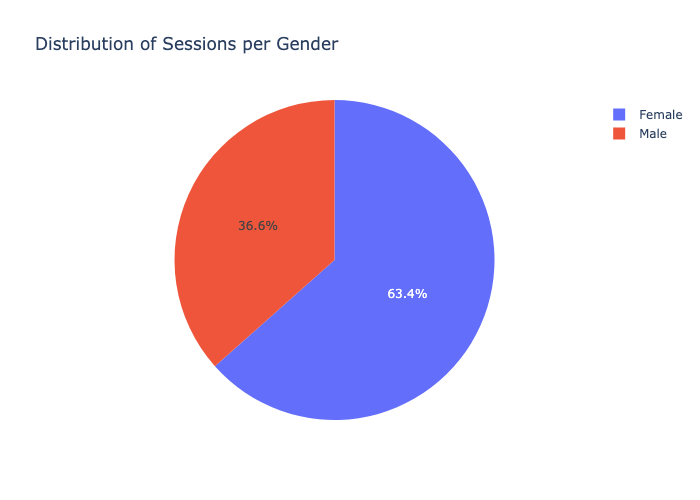

In [13]:
# Using the Python Function from above to visualize the Distribution for Gender
data_viz(df, "Gender", "pie")

#### Question 3: What is Distribution of Domestic vs International Students?

In [14]:
%%sql

SELECT 
    inter_dom
    , COUNT(*) AS Inter_Dom_Count
FROM mental_health
WHERE Gender IS NOT NULL
GROUP BY inter_dom;

 * sqlite:///mental_heath.db
Done.


inter_dom,Inter_Dom_Count
Dom,67
Inter,201


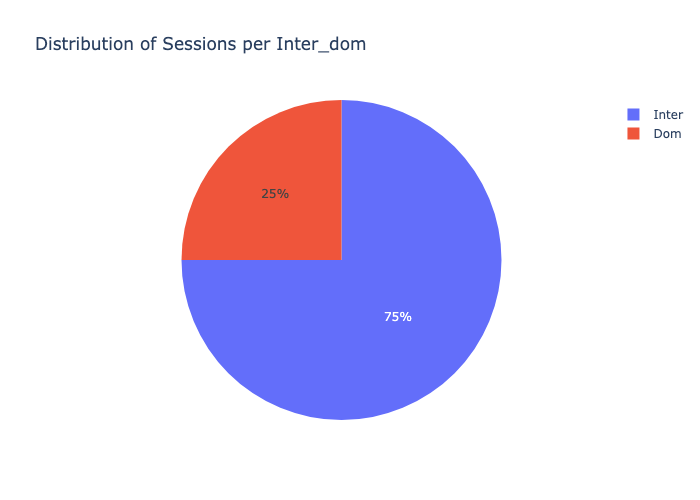

In [15]:
data_viz(df, "inter_dom", "pie")

#### Question 4: Where are the International (Non-Japanese) Students from?

In [16]:
%%sql

SELECT 
    Region
    , COUNt(*) AS Region_Count
FROM mental_health
WHERE Gender IS NOT NULL
    AND Region != "JAP"
GROUP BY Region
ORDER BY Region_Count DESC;

 * sqlite:///mental_heath.db
Done.


Region,Region_Count
SEA,122
EA,48
SA,18
Others,11


1) SEA - Southeast Asia.
2) JAP - Japan.
3) EA - East Asia.
4) SA - South Asia.
5) Others - Countries or regions not specifically categorized within the provided abbreviations.

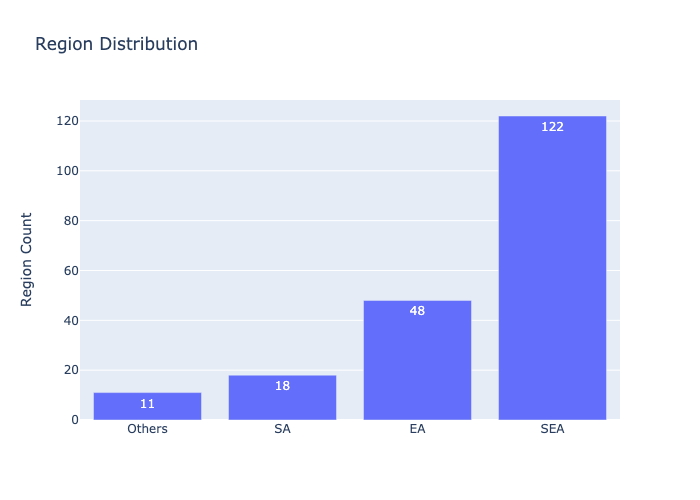

In [17]:
df_no_japan = df[df["Region"] != "JAP"]

data_viz(df_no_japan, "Region", "bar")

#### Question 5: What is the Distribution of Academic Type among the students in this dataset?

In [18]:
%%sql

SELECT 
    Academic
    , COUNT(*) AS Academic_Count
FROm mental_health
WHERE Gender IS NOT NULL
GROUP BY Academic;

 * sqlite:///mental_heath.db
Done.


Academic,Academic_Count
Grad,21
Under,247


1) Grad - Graduate
2) Under - Undergraduate (Students who are still in the midst of the Bachelor Degree)

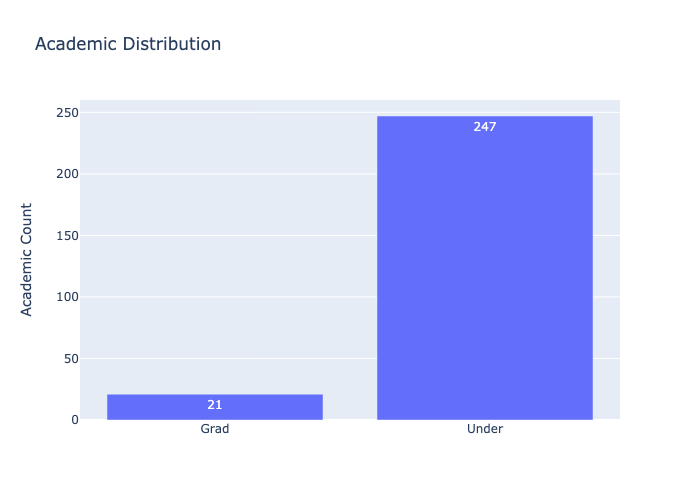

In [19]:
data_viz(df, "Academic")

### Taking Time to Understand the Mental Health Depression Scores
1) **PHQ-9**: To measure Depression, the Patient Health Questionnaire PHQ-9 was utilized, which consists of questions to examine the depression symptoms as well as depression severity.

2) **SCS**: The Social Connectedness Scale (SCS) was developed by Lee and Robins was the tool used to measure individual emotional distance or connectedness among themselves and other people.

3) **ASSISS**: Acculturation *(the balance of different cultures)* was measured by Acculturative Stress Scale for International Students (ASSIS) [14]. The scale covers seven categories, including Perceived Discrimination, Homesickness, Perceived Hatred, Fear, Culture Shock, Guilt, and Miscellaneous

Overview of the Scores:

In [20]:
%%sql
-- Overview of the scores
-- Basic summary statistics of the diagnostic tests for all students
SELECT 
     MIN("ToDep") AS min_phq
    , MAX("ToDep") AS max_phq
    , ROUND(AVG("ToDep"), 2) AS avg_phq
    , MIN("ToSC") AS min_scs
    , MAX("ToSC") AS max_scs
    , ROUND(AVG("ToSC"), 2) AS avg_scs
    , MIN("ToAS") AS min_as
    , MAX("ToAS") AS max_as
    , ROUND(AVG("ToAS"), 2) AS avg_as
FROM mental_health;

 * sqlite:///mental_heath.db
Done.


min_phq,max_phq,avg_phq,min_scs,max_scs,avg_scs,min_as,max_as,avg_as
0.0,25.0,8.19,8.0,48.0,37.47,36.0,145.0,72.38


#### Question 6: What is the summary statistics between Domestic vs International Students?

In [21]:
%%sql

SELECT 
    inter_dom
    , MIN("ToDep") AS min_phq
    , MAX("ToDep") AS max_phq
    , ROUND(AVG("ToDep"), 2) AS avg_phq
    , MIN("ToSC") AS min_scs
    , MAX("ToSC") AS max_scs
    , ROUND(AVG("ToSC"), 2) AS avg_scs
    , MIN("ToAS") AS min_as
    , MAX("ToAS") AS max_as
    , ROUND(AVG("ToAS"), 2) AS avg_as
FROM mental_health
WHERE inter_dom IS NOT NULL
GROUP BY inter_dom;

 * sqlite:///mental_heath.db
Done.


inter_dom,min_phq,max_phq,avg_phq,min_scs,max_scs,avg_scs,min_as,max_as,avg_as
Dom,0.0,23.0,8.61,8.0,48.0,37.64,36.0,112.0,62.84
Inter,0.0,25.0,8.04,11.0,48.0,37.42,36.0,145.0,75.56


### International Focus

The results gathered shows that that international students presented a higher risk of having mental health difficulties. However, the data is also skewed towards international students. Let's take a closer look at this student group.

In [22]:
%%sql
SELECT 
       CAST(Age AS int) AS Age
       , ROUND(AVG("ToDep"), 2) AS avg_phq
       , ROUND(AVG("ToSC"), 2) AS avg_scs
       , ROUND(AVG("ToAS"), 2) AS avg_as
FROM mental_health
WHERE inter_dom = 'Inter'
GROUP BY Age
ORDER BY Age;

 * sqlite:///mental_heath.db
Done.


Age,avg_phq,avg_scs,avg_as
17,4.67,37.33,70.67
18,8.75,34.11,80.61
19,8.44,37.9,74.1
20,7.35,38.21,73.26
21,9.23,37.74,75.23
22,8.36,38.14,70.43
23,9.67,32.0,81.25
24,4.67,42.33,74.33
25,6.11,37.33,80.78
27,10.0,35.0,42.0


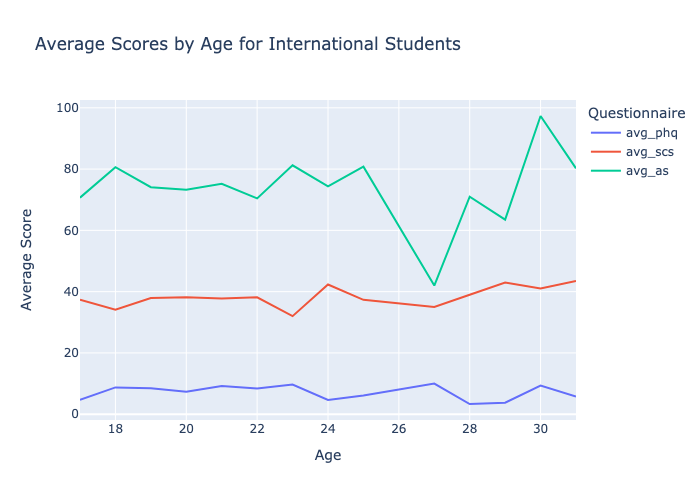

In [24]:
query = """
    SELECT 
        CAST(Age AS int) AS Age,
        ROUND(AVG("ToDep"), 2) AS avg_phq,
        ROUND(AVG("ToSC"), 2) AS avg_scs,
        ROUND(AVG("ToAS"), 2) AS avg_as
    FROM mental_health
    WHERE inter_dom = 'Inter'
    GROUP BY Age
    ORDER BY Age;
"""
df = pd.read_sql_query(query, conn)

# Use Plotly Express to create the line plot
fig = px.line(df, x='Age', y=['avg_phq', 'avg_scs', 'avg_as'], 
              title='Average Scores by Age for International Students',
              labels={'value': 'Average Score', 'variable': 'Questionnaire'})

# Show the plot
fig.show("png")

### Thank you for taking time to view my project! 😊